## Read in cache

In [1]:
import mdtraj as md
import numpy as np
from tqdm import tqdm
from perses.analysis.utils import open_netcdf
import os
from simtk.openmm import unit

In [116]:
# outdir = "/data/chodera/zhangi/perses_benchmark/blues/barnase_barstar/apo/thr_cache"
outdir = "/data/chodera/zhangi/perses_benchmark/neq/7/21/blues/"

In [7]:
# nc = open_netcdf(os.path.join(outdir, f"thr_0.nc"))
# n_iter, n_atoms, n_xyz = nc.variables['coordinates'].shape

In [8]:
# n_atoms

91578

In [9]:
# outdir = "/data/chodera/zhangi/perses_benchmark/blues/barnase_barstar/complex/thr_cache"
# outdir = "/data/chodera/zhangi/perses_benchmark/neq/7/14/blues/"

In [32]:
# nc = open_netcdf(os.path.join(outdir, f"barnase_barstar_2.nc"))
# n_iter, n_atoms, n_xyz = nc.variables['coordinates'].shape

In [33]:
# n_atoms

28712

In [12]:

# all_pos = []
# for i in tqdm(range(82)):
#     if os.path.exists(os.path.join(outdir, f'thr_{i}.nc')):
#         traj = md.load_netcdf(os.path.join(outdir, f'thr_{i}.nc'), 
#                       top='/data/chodera/zhangi/perses_benchmark/neq/7/14/blues/apo.pdb')
#         if traj[1:].xyz.shape[0] > 0:
#             print(i, traj[1:].xyz.shape[0])
#             for arr in traj[1:].xyz:
#                 all_pos.append(arr)

In [52]:
# len(all_pos)


219

In [117]:
all_pos = []
for filename in os.listdir(outdir):
    if filename.endswith(".npy"):
        if filename != 'thr_pos_hybrid.npy':
            arr = np.load(os.path.join(outdir, filename), allow_pickle=True)
#             pos_arr = []
#             for pos in arr:
#                 coord_arr = np.array([coord.value_in_unit_system(unit.md_unit_system) for coord in pos])
#                 pos_arr.append(coord_arr)
            all_pos.append(arr)

In [118]:
len(all_pos)

86

In [5]:
import pickle

In [81]:
i = 21
aa = 'thr'
length = '5ns'
out_dir = f"/data/chodera/zhangi/perses_benchmark/neq/7/{i}/"

In [82]:
htf = pickle.load(open(f"/data/chodera/zhangi/perses_benchmark/neq/7/{i}/{i}_vacuum.pickle", "rb" ))

In [83]:
old_top = md.Topology.from_openmm(htf._topology_proposal.old_topology)

In [60]:
for atom in old_top.atoms:
    print(atom.index, atom)

0 ACE1-H1
1 ACE1-CH3
2 ACE1-H2
3 ACE1-H3
4 ACE1-C
5 ACE1-O
6 THR2-N
7 THR2-H
8 THR2-CA
9 THR2-HA
10 THR2-CB
11 THR2-C
12 THR2-O
13 THR2-HB
14 THR2-CG2
15 THR2-HG21
16 THR2-HG22
17 THR2-HG23
18 THR2-OG1
19 THR2-HG1
20 NME3-N
21 NME3-H
22 NME3-C
23 NME3-H1
24 NME3-H2
25 NME3-H3


In [92]:
traj = md.Trajectory(np.array(all_pos), old_top)

In [39]:
all_pos

[array([[ 0.59340652,  0.12329621,  0.13668217],
        [ 0.52188677,  0.12313563,  0.05131545],
        [ 0.42873142,  0.08933418,  0.06908618],
        [ 0.56052067,  0.05044706, -0.01618318],
        [ 0.51867997,  0.26523208,  0.00113261],
        [ 0.58957022,  0.30595265, -0.09003761],
        [ 0.45131861,  0.34584976,  0.08220898],
        [ 0.39162455,  0.31741085,  0.1582752 ],
        [ 0.42170382,  0.49424509,  0.05203358],
        [ 0.44944782,  0.50939418, -0.05320008],
        [ 0.28168397,  0.54187717,  0.06668503],
        [ 0.52755352,  0.57354713,  0.13622769],
        [ 0.48425783,  0.64897406,  0.22524367],
        [ 0.25677835,  0.53275689,  0.17937937],
        [ 0.2547819 ,  0.6889275 ,  0.02323601],
        [ 0.29262256,  0.76189032,  0.09739216],
        [ 0.14338902,  0.70437568,  0.00533401],
        [ 0.29971333,  0.70279201, -0.08046863],
        [ 0.19223515,  0.46005287, -0.00380077],
        [ 0.21203324,  0.45722045, -0.09776458],
        [ 0.65823308

In [93]:
traj[[0,1]].save("blues.pdb")

In [ ]:
for atom in traj.topology.atoms:
    print(atom, atom.index)

In [86]:
dihedrals = np.sin(md.compute_dihedrals(traj, np.array([[18, 10, 8, 6]]))) # from dominic (using mdtraj indices)

In [87]:
from perses.dispersed import feptasks
t0, g, neff_max, a_t, uncorrelated_indices = feptasks.compute_timeseries(dihedrals)

In [88]:
from matplotlib import pyplot as plt

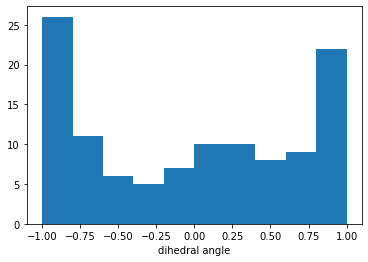

In [89]:
plt.hist(dihedrals)
plt.xlabel("dihedral angle")
plt.show()

In [34]:
bb_dihedrals = np.sin(md.compute_dihedrals(traj, np.array([[6, 8, 11, 20]])))

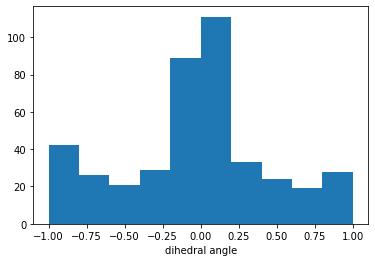

In [35]:
plt.hist(bb_dihedrals)
plt.xlabel("dihedral angle")
plt.show()

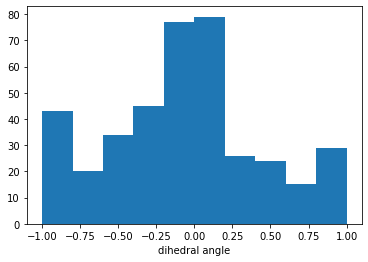

In [36]:
plt.hist(dihedrals[uncorrelated_indices])
plt.xlabel("dihedral angle")
plt.show()

In [17]:
snapshots = np.random.choice(uncorrelated_indices, size=200, replace=False)


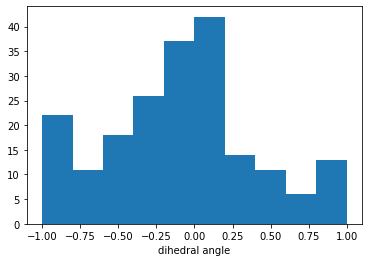

In [18]:
plt.hist(dihedrals[snapshots])
plt.xlabel("dihedral angle")
plt.show()

In [76]:
with open(os.path.join(outdir, f"thr_pos_hybrid.npy"), 'wb') as f:
    np.save(f, all_pos)

In [14]:
# Read in ser cache
with open(os.path.join(outdir, f"thr_pos_hybrid.npy"), 'rb') as f:
    pos_hybrid = np.load(f)


In [78]:
all_pos[0].shape

(26, 3)

In [103]:
traj[1].xyz[0]

array([[0.18956955, 0.20775123, 1.8539498 ],
       [0.203731  , 0.21808383, 1.9603349 ],
       [0.1791193 , 0.12056664, 2.0031877 ],
       [0.12648715, 0.28992423, 1.9934508 ],
       [0.3427    , 0.2641    , 2.        ],
       [0.4391    , 0.1877    , 2.        ],
       [0.3555    , 0.397     , 2.        ],
       [0.269483  , 0.4505133 , 2.0073862 ],
       [0.4853    , 0.4614    , 2.        ],
       [0.5534357 , 0.4461087 , 2.0790267 ],
       [0.5570441 , 0.41088048, 1.8651558 ],
       [0.4713    , 0.6129    , 2.        ],
       [0.3601    , 0.6653    , 2.        ],
       [0.61081153, 0.31055874, 1.875249  ],
       [0.46833977, 0.41072643, 1.7430288 ],
       [0.47001544, 0.5167808 , 1.7052137 ],
       [0.36411005, 0.3797936 , 1.7656803 ],
       [0.51717633, 0.34017375, 1.6767964 ],
       [0.669736  , 0.4975572 , 1.8541709 ],
       [0.74158084, 0.46298844, 1.9097537 ],
       [0.5846    , 0.6835    , 2.        ],
       [0.6736237 , 0.6363863 , 1.9765742 ],
       [0.

In [104]:
# Create the system
from simtk import openmm
from simtk.openmm import app
print('Creating OpenMM System...')
ffxml_filenames = ['amber14/protein.ff14SB.xml', 'amber14/tip3p.xml']

forcefield = app.ForceField(*ffxml_filenames)

system = forcefield.createSystem(htf._topology_proposal.old_topology, nonbondedMethod=app.NoCutoff, constraints=app.HBonds, removeCMMotion=False, hydrogenMass=4*unit.amu)

pressure = 1.0 * unit.atmospheres
temperature = 310 * unit.kelvin
collision_rate = 91.0 / unit.picoseconds
timestep = 2.0 * unit.femtoseconds
integrator = openmm.LangevinIntegrator(temperature, collision_rate, timestep)
context = openmm.Context(system, integrator)
context.setPositions(traj[1].xyz[0])

Creating OpenMM System...


In [111]:
context.setPositions(traj[1].xyz[0])
context.getState(getEnergy=True).getPotentialEnergy()/unit.kilocalories_per_mole

-12.858088112242129

In [110]:
context.setPositions(traj[0].xyz[0])
context.getState(getEnergy=True).getPotentialEnergy()/unit.kilocalories_per_mole

29.394642116918604